# Выбор локации для скважины

## Шаг. 1. Загрузка данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sweetviz as sv
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import mean_squared_error

In [3]:
try:
    data_1 = pd.read_csv('/datasets/geo_data_0.csv')
    data_2 = pd.read_csv('/datasets/geo_data_1.csv')
    data_3 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    data_1 = pd.read_csv('geo_data_0.csv')
    data_2 = pd.read_csv('geo_data_1.csv')
    data_3 = pd.read_csv('geo_data_2.csv')

In [4]:
print(data_1.head())
print(data_2.head())
print(data_3.head())

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


In [5]:
print(data_1.shape)
print(data_2.shape)
print(data_3.shape)

(100000, 5)
(100000, 5)
(100000, 5)


In [6]:
print(data_1.info())
print(data_2.info())
print(data_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  

In [7]:
print(data_1.duplicated().sum())
print(data_2.duplicated().sum())
print(data_3.duplicated().sum())

0
0
0


Вывод: В датасете 100 тысяч строк, что достаточно для качественного обучения моделей. Явные дубликаты отсутствуют. Пропуски отсутствуют

In [28]:
report = sv.analyze([data_1, " Permit Logs"])

                                             |          | [  0%]   00:00 -> (? left)

In [29]:
report.show_html('common analysis.html')

Report common analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Шаг 2. Обучение и проверка моделей для каждого региона

In [8]:
# выделяем признаки и целевой признак для 3-х датафреймов
# удаляем для признаков столбец id, поскольу он не характеризует целевой признак
    
features_1 = data_1.drop(['id', 'product'], axis=1)
target_1 = data_1['product']

features_2 = data_2.drop(['id', 'product'], axis=1)
target_2 = data_2['product']

features_3 = data_3.drop(['id', 'product'], axis=1)
target_3 = data_3['product']

target_1.head()

0    105.280062
1     73.037750
2     85.265647
3    168.620776
4    154.036647
Name: product, dtype: float64

In [9]:
# делим данные на обучающую и валидационную выборки

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, target_1, test_size=0.25, random_state=12345)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2, test_size=0.25, random_state=12345)

features_train_3, features_valid_3, target_train_3, target_valid_3 = train_test_split(features_3, target_3, test_size=0.25, random_state=12345)

In [10]:
print(features_train_1.shape)
print(features_train_2.shape)
print(features_train_3.shape)

(75000, 3)
(75000, 3)
(75000, 3)


**Первый нефтяной регион**

In [11]:
# обучим модель линейной регрессии 

model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
predictions_1 = model_1.predict(features_valid_1)
mse_1 = mean_squared_error(target_valid_1, predictions_1)
rmse_1 = mse_1**0.5
print("RMSE для первого нефтяного региона:", rmse_1.round(2))
print("Средний запас предсказанного сырья для первого нефтяного региона:", predictions_1.mean().round(2))

RMSE для первого нефтяного региона: 37.58
Средний запас предсказанного сырья для первого нефтяного региона: 92.59


In [12]:
predictions = pd.Series(target_1.mean(), index=target_1.index)
mse = mean_squared_error(target_1, predictions)
rmse = mse**0.5

print("RMSE:", rmse.round(2))

RMSE: 44.29


**Второй нефтяной регион**

In [13]:
# обучим модель линейной регрессии 

model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
predictions_2 = model_2.predict(features_valid_2)
mse_2 = mean_squared_error(target_valid_2, predictions_2)
rmse_2 = mse_2**0.5
print("RMSE для второго нефтяного региона:", rmse_2.round(2))
print("Средний запас предсказанного сырья для второго нефтяного региона:", predictions_2.mean().round(2))

RMSE для второго нефтяного региона: 0.89
Средний запас предсказанного сырья для второго нефтяного региона: 68.73


In [14]:
predictions = pd.Series(target_2.mean(), index=target_2.index)
mse = mean_squared_error(target_2, predictions)
rmse = mse**0.5

print("RMSE:", rmse.round(2))

RMSE: 45.94


**Третий нефтяной регион**

In [15]:
# обучим модель линейной регрессии 

model_3 = LinearRegression()
model_3.fit(features_train_3, target_train_3)
predictions_3 = model_3.predict(features_valid_3)
mse_3 = mean_squared_error(target_valid_3, predictions_3)
rmse_3 = mse_3**0.5
print("RMSE для третьего нефтяного региона:", rmse_3.round(2))
print("Средний запас предсказанного сырья для третьего нефтяного региона:", predictions_3.mean().round(2))

RMSE для третьего нефтяного региона: 40.03
Средний запас предсказанного сырья для третьего нефтяного региона: 94.97


In [16]:
predictions = pd.Series(target_3.mean(), index=target_3.index)
mse = mean_squared_error(target_3, predictions)
rmse = mse**0.5

print("RMSE:", rmse.round(2))

RMSE: 44.75


**Вывод:** Полученные модели линейной регрессии сравнили с константной моделью для проверки адекватности. В каждом из вариантов линейная регрессия имела меньшее значение rmse, чем константная модель, что говорит об адекватности полученных моделей. 
Также можно заметить, что чем выше среднее значение запасов на скважину, тем меньше корень из среднеквадратичной ошибки. Наименьший разброс значений наблюдается у второго нефтяного региона. Больше всего запасов на скважину прогнозируется в третьем регионе

## Шаг 3. Подготовка к расчёту прибыли

In [17]:
BUDGET = 10000000000 # бюджет на разработку региона
BARREL_REVENUE = 450000 # доход с 1000 баррелей нефти
DEVELOPMENT_POINTS = 200 # кол-во скважин в регионе для разработки

In [18]:
# Для выхода в плюс необходимо, чтобы доход с продажи нефти превысил бюджет на разработку нефтяного региона.

x = DEVELOPMENT_POINTS  * BARREL_REVENUE # рассчитаем доход со всех скважин, если бы запас сырья у каждой был 1 тыс. баррелей
minimal_reserves_per_well = BUDGET / x # рассчитаем минимальный запас у скважины для безубыточной разработки, т.е. чтобы доход от нефти был не меньше, чем инвестиции
print('Минимальный объем сырья для безубыточной разработки скважины составялет', minimal_reserves_per_well, "тыс. баррелей")

Минимальный объем сырья для безубыточной разработки скважины составялет 111.11111111111111 тыс. баррелей


In [19]:
# еще раз выведем на экран средний прогнозируемый объем запасов на скважину

print(predictions_1.mean())
print(predictions_2.mean())
print(predictions_3.mean())

92.59256778438035
68.728546895446
94.96504596800489


**Вывод:** Рассчитан минимальный объем сырья на скважину для безубыточной разработки скважины, который составляет 111,1 тыс. баррелей нефти. Средний прогнозируемый объем запасов на скважину меньше, чем объём сырья для безубыточной разработки новой скважины. На данный момент, кажется, что проекты окажутся неокупаемыми в каждом из регионов. Поэтому будем выбирать зоны для бурения с максимальными запасами.

## Шаг 4. Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [20]:
def income_calculation(target_valid, predictions):
    predictions_sorted = pd.Series(predictions).sort_values(ascending=False)
    predictions_top200 = predictions_sorted.head(200).index
    revenue = target_valid.reset_index(drop=True).iloc[predictions_top200].sum()*BARREL_REVENUE - BUDGET
    return revenue/1000000000

In [21]:
print("Прибыль от первого нефтяного региона:", round(income_calculation(target_valid_1, predictions_1), 3), "млрд. рублей")

Прибыль от первого нефтяного региона: 3.321 млрд. рублей


In [22]:
print("Прибыль от второго нефтяного региона:", round(income_calculation(target_valid_2, predictions_2), 3), "млрд. руб.")

Прибыль от второго нефтяного региона: 2.415 млрд. руб.


In [23]:
print("Прибыль от третьего нефтяного региона:", round(income_calculation(target_valid_3, predictions_3), 3), "млрд. руб.")

Прибыль от третьего нефтяного региона: 2.71 млрд. руб.


**Вывод:** Расчет прибыли для 200 лучших по запасам точек показал, что наибольшую прибыль можно получить с первого нефтяного региона

## Шаг 5. Расчет рисков и прибыли для каждого региона.

In [24]:
state = np.random.RandomState(12345)
def bootstrap(target_valid, predictions):
    values = []
    for i in range(1000):
        predicted = pd.Series(predictions)
        subsample = predicted.sample(n=500, replace=True, random_state=state)
        values.append(income_calculation(target_valid, subsample))

    values = pd.Series(values)
    lower = values.quantile(0.025)
    higher = values.quantile(0.975)

    # визуализируем
    values.hist(figsize=(10, 5), bins=50, color='orange')
    plt.grid(True)
    plt.axvline(values.quantile(0.025), color='red')
    plt.axvline(values.quantile(0.975), color='green')
    plt.legend(['Нижняя граница доверительного интервала', 
                'Верхняя граница доверительного интервала', 'Распределение прибыли'])
    plt.xlabel('Прибыль, млрд. руб.')
    plt.ylabel('Количество скважин')
    plt.title('Распределение прибыли')
    plt.show()

    print('Средняя прибыль:',round(sum(values)/len(values),3), "млрд. руб.")
    print('Верхнее значение доверительного интервала:', round(higher,3), "млрд. руб.")
    print('Нижнее значение доверительного интервала:', round(lower,3), "млрд. руб.")
    print('Риск убытков:',round(len(values[values < 0])/len(values)*100,2), "%")  

Первый нефтяной регион:


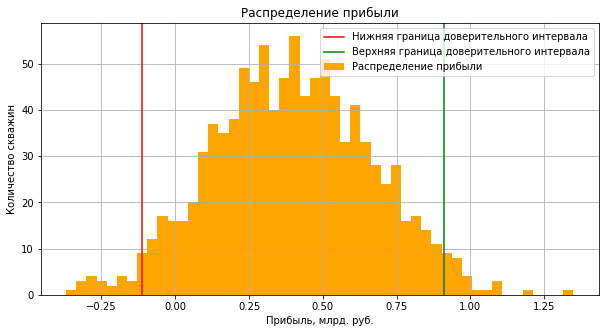

Средняя прибыль: 0.396 млрд. руб.
Верхнее значение доверительного интервала: 0.91 млрд. руб.
Нижнее значение доверительного интервала: -0.111 млрд. руб.
Риск убытков: 6.9 %
None


In [25]:
print("Первый нефтяной регион:")
print(bootstrap(target_valid_1, predictions_1))

Второй нефтяной регион:


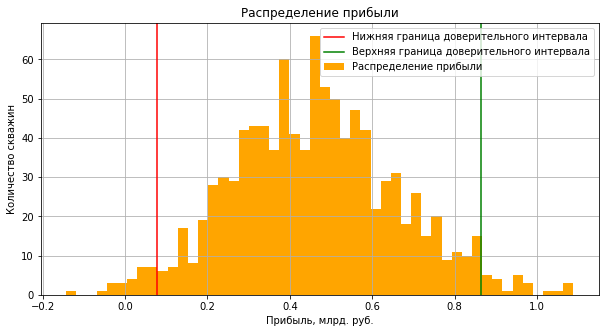

Средняя прибыль: 0.461 млрд. руб.
Верхнее значение доверительного интервала: 0.863 млрд. руб.
Нижнее значение доверительного интервала: 0.078 млрд. руб.
Риск убытков: 0.7 %
None


In [26]:
print("Второй нефтяной регион:")
print(bootstrap(target_valid_2, predictions_2))

Третий нефтяной регион:


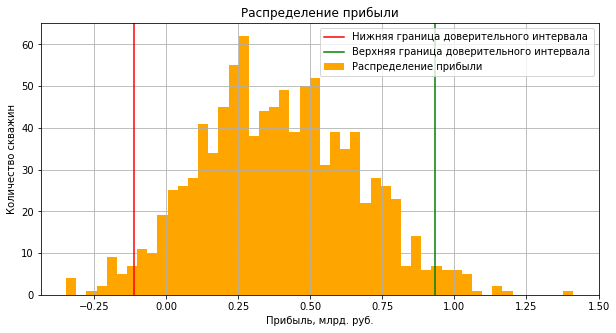

Средняя прибыль: 0.393 млрд. руб.
Верхнее значение доверительного интервала: 0.935 млрд. руб.
Нижнее значение доверительного интервала: -0.112 млрд. руб.
Риск убытков: 6.5 %
None


In [27]:
print("Третий нефтяной регион:")
print(bootstrap(target_valid_3, predictions_3))

**Вывод:** В ходе исследования выяснилось, что:
- У второго нефтяного региона самый низкий RMSE и самый низкий запас предсказанного сырья на скважину. 
- При бурении 200 лучших скважин, наибольшую прибыль можно получить на первом нефтяном регионе.
- С помощью техники bootstrap выяснено, что второй регион имеет наивысшее значений средней прибыли и нименьший риск убытков.
- Таким образом, предлагается разрабатывать именно второй нефтяной регион.